# **Neural network classificaton with tensorflow**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_circles
import tensorflow as tf
import matplotlib.pyplot as plt

2024-07-22 21:33:17.628283: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-22 21:33:17.638499: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-22 21:33:17.649287: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-22 21:33:17.649306: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1442] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-22 21:33:17.657729: I tensorflow/core/platform/cpu_feature_gua

## **Create artificial dataset**

In [2]:
n_samples = 1000

In [3]:
X, y = make_circles(
    n_samples = n_samples,
    noise = 0.03,
    random_state = 42
)

In [4]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [6]:
circles = pd.DataFrame({
    'X0': X[:, 0],
    'X1': X[:, 1],
    "label": y
})

In [7]:
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


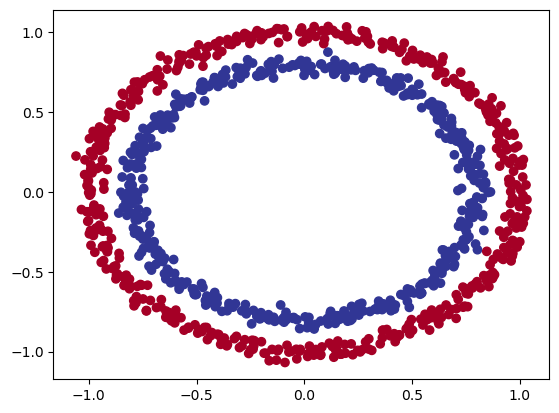

In [8]:
plt.scatter(x = circles.iloc[:, 0], y = circles.iloc[:, 1], c = circles.iloc[:, 2], cmap = 'RdYlBu');

## **Create initial model**

In [9]:
tf.keras.utils.set_random_seed(42)

model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 1)
])

model_1.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']
)

model_1.fit(
    x = X,
    y = y,
    epochs = 200,
)

2024-07-22 21:33:19.799176: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-22 21:33:19.834018: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-22 21:33:19.834067: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-22 21:33:19.836376: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-22 21:33:19.836412: I external/local_xla/xla/stream_executor

Epoch 1/200


:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-07-22 21:33:19.967958: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9711 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6


 1/32 ━━━━━━━━━━━━━━━━━━━━ 10s 345ms/step - accuracy: 0.4062 - loss: 6.6812

I0000 00:00:1721676800.475321   19106 service.cc:145] XLA service 0x7f4b2c005cc0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1721676800.475372   19106 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3060, Compute Capability 8.6
2024-07-22 21:33:20.488757: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-22 21:33:20.511029: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1721676800.637707   19106 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4387 - loss: 5.2495 
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 920us/step - accuracy: 0.5405 - loss: 4.9786
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - accuracy: 0.4906 - loss: 6.5521
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 847us/step - accuracy: 0.5281 - loss: 6.1551
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.5182 - loss: 6.1637
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.5190 - loss: 6.1544
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.5125 - loss: 6.0204
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - accuracy: 0.4980 - loss: 6.0039
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 875us/step - accuracy: 0.5028 - loss: 5.6614
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 886us/step - accuracy: 0.4799 - loss: 4.2456
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.5135 - loss: 1.4064
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step 

In [10]:
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927


[0.6932879686355591, 0.4729999899864197]

## **Improve the model**

### **Add extra leayer**

In [11]:
tf.keras.utils.set_random_seed(42)

model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.SGD(),
    metrics = ['accuracy']
)

model_2.fit(X, y, epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4561 - loss: 7.1205
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4246 - loss: 6.6184 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 7.6996 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 7.6996 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 7.6996 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 7.6996 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 7.6996 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 7.6996 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 7.6996 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 7.6996 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5170 - loss: 7.6996 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step -

In [12]:
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5045 - loss: 7.8989


[7.971191883087158, 0.5]

### **Add extra layer; Change the optimizer**

In [13]:
tf.keras.utils.set_random_seed(42)

model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

model_3.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

model_3.fit(
    x = X, 
    y = y,
    epochs = 100
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4589 - loss: 4.0498     
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.4678 - loss: 1.2576
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - accuracy: 0.4830 - loss: 0.7323
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - accuracy: 0.4830 - loss: 0.7087
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step - accuracy: 0.4830 - loss: 0.6989
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 932us/step - accuracy: 0.4830 - loss: 0.6959
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.4376 - loss: 0.6951
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4500 - loss: 0.6949 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 970us/step - accuracy: 0.4427 - loss: 0.6949
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.4508 - loss: 0.6950
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 955us/step - accuracy: 0.4497 - loss: 0.6951
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━

In [14]:
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5159 - loss: 0.6915


[0.6955134868621826, 0.49399998784065247]

### **Create plotting function**

In [15]:
def plot_decision_boundary(model, X, y):
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 100),
        np.linspace(y_min, y_max, 100)
    )

    x_in = np.c_[xx.ravel(), yy.ravel()]

    y_pred = model.predict(x_in)

    # if len(y_pred[0]) > 1:
    if model.output_shape[-1] > 1:
        print('Multiclassification')
        y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
    else:
        print('Binary classification')
        # y_pred = y_pred.round().reshape(xx.shape)
        y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
    plt.scatter(X[:, 0], X[:, 1], c = y, s = 40, cmap = plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Binary classification


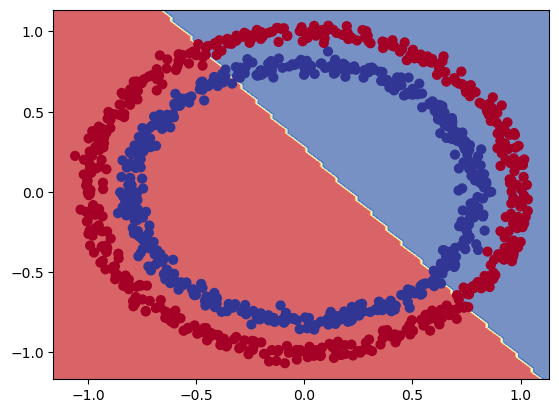

In [16]:
plot_decision_boundary(model_3, X, y)

### **Apply model 3 for regression problems**

#### **Generate datasets**

In [17]:
tf.keras.utils.set_random_seed(42)

# y = x + 10
X_reg = tf.range(0, 1000, 5)
y_reg = tf.range(10, 1010, 5)

#### **Split the datasets**

In [18]:
X_reg_train = X_reg[:150]
X_reg_test = X_reg[150:]
y_reg_train = y_reg[:150]
y_reg_test = y_reg[150:]

In [19]:
len(X_reg_train), len(X_reg_test), len(y_reg_train), len(y_reg_test)

(150, 50, 150, 50)

In [20]:
tf.keras.utils.set_random_seed(42)

model_3_reg = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

model_3_reg.compile(
    loss = tf.keras.losses.mae,
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['mae']
)

model_3_reg.fit(
    x = tf.expand_dims(X_reg_train, axis = -1), 
    y = y_reg_train,
    epochs = 10
)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 124ms/step - loss: 401.7897 - mae: 401.7897
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 283.4704 - mae: 283.4704 
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 162.9053 - mae: 162.9053 
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 44.2691 - mae: 44.2691 
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 54.3895 - mae: 54.3895 
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 50.1590 - mae: 50.1590 
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12.7310 - mae: 12.7310 
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.8833 - mae: 23.8833 
Epoch 9/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 11.2368 - mae: 11.2368
Epoch 10/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 10.6657 - mae: 10.6657 


In [21]:
y_reg_pred = model_3_reg.predict(X_reg_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step


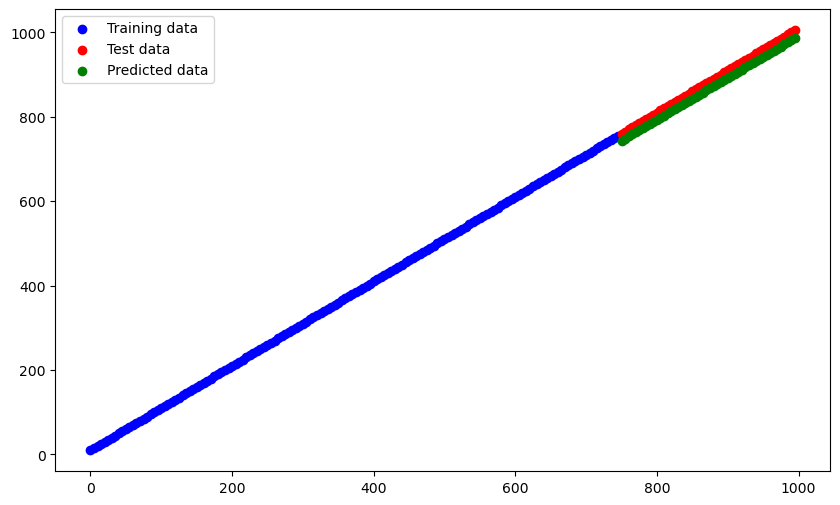

In [22]:
plt.figure(figsize = (10, 6))
plt.scatter(X_reg_train, y_reg_train, c = 'blue', label = 'Training data')
plt.scatter(X_reg_test, y_reg_test, c = 'red', label = 'Test data')
plt.scatter(X_reg_test, y_reg_pred, c = 'green', label = 'Predicted data')
plt.legend();

### **Add non-linearity**

In [23]:
tf.keras.utils.set_random_seed(42)

model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 1, activation = tf.keras.activations.linear)
])

model_4.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    # metrics = [tf.keras.metrics.binary_accuracy],
    metrics = ['accuracy']
)

history_4 = model_4.fit(
    x = X, 
    y = y,
    epochs = 100
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4475 - loss: 5.9027 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4445 - loss: 5.8900 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 966us/step - accuracy: 0.4452 - loss: 5.8899
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4445 - loss: 5.8860 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.4472 - loss: 5.8597
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 992us/step - accuracy: 0.4460 - loss: 5.7345
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.4453 - loss: 5.6604
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4449 - loss: 5.6259 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4450 - loss: 5.6092 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4460 - loss: 5.5136 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - accuracy: 0.4470 - loss: 5.2122
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 986u

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step
Binary classification


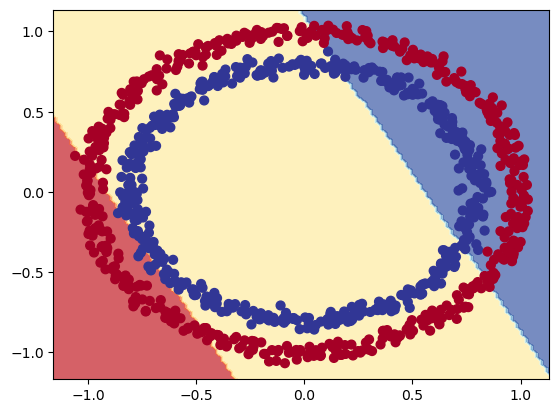

In [24]:
plot_decision_boundary(model_4, X, y)

In [25]:
tf.keras.utils.set_random_seed(42)

model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 1, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(units = 1, activation = tf.keras.activations.sigmoid),
])

model_5.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

history_5 = model_5.fit(
    x = X, 
    y = y,
    epochs = 100
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4810 - loss: 0.8083
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4749 - loss: 0.7936
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4711 - loss: 0.7810
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4646 - loss: 0.7704
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4626 - loss: 0.7615
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4647 - loss: 0.7540 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4623 - loss: 0.7478 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4634 - loss: 0.7426 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4559 - loss: 0.7381 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4525 - loss: 0.7345 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4511 - loss: 0.7314 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc

In [26]:
model_5.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4955 - loss: 0.6932


[0.6931473016738892, 0.5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Binary classification


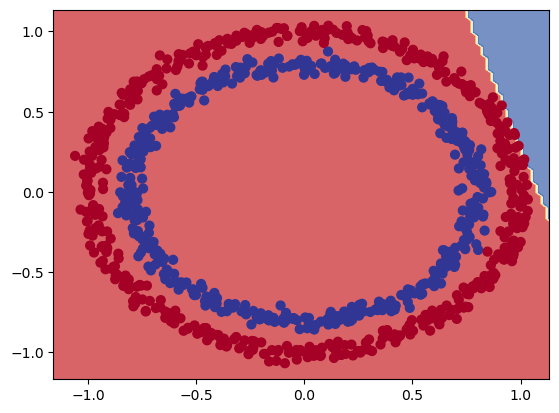

In [27]:
plot_decision_boundary(model_5, X, y)

In [28]:
tf.keras.utils.set_random_seed(42)

model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(units = 4, activation = tf.keras.activations.relu),
    tf.keras.layers.Dense(units = 1, activation = tf.keras.activations.sigmoid),
])

model_6.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

history_6 = model_6.fit(
    x = X, 
    y = y,
    epochs = 100
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5038 - loss: 0.7154 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4781 - loss: 0.7080 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 909us/step - accuracy: 0.4775 - loss: 0.7033
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4757 - loss: 0.7002 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.4771 - loss: 0.6981
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 962us/step - accuracy: 0.4708 - loss: 0.6967
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.3960 - loss: 0.6955
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4830 - loss: 0.6946 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 961us/step - accuracy: 0.4830 - loss: 0.6937
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 974us/step - accuracy: 0.4830 - loss: 0.6928
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.4830 - loss: 0.6920
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1

In [29]:
model_6.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8494 - loss: 0.4415


[0.41582950949668884, 0.8700000047683716]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Binary classification


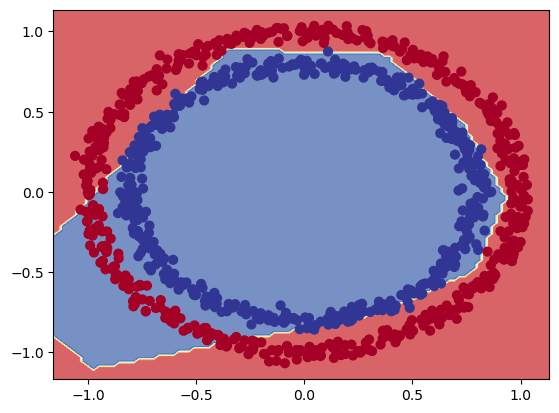

In [30]:
plot_decision_boundary(model_6, X, y)

In [31]:
tf.keras.utils.set_random_seed(42)

model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate = 0.01),
                metrics=['accuracy'])

history_7 = model_7.fit(
    x = X,
    y = y,
    epochs=100
)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4941 - loss: 0.7046 
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.4775 - loss: 0.6907
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5295 - loss: 0.6834 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5696 - loss: 0.6738 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6084 - loss: 0.6605 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6431 - loss: 0.6410 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6694 - loss: 0.6043 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7606 - loss: 0.5572 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7862 - loss: 0.4989 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8329 - loss: 0.4482 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8671 - loss: 0.4129 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 989us/st

In [32]:
model_7.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9935 - loss: 0.0149


[0.01310949306935072, 0.9959999918937683]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step
Binary classification


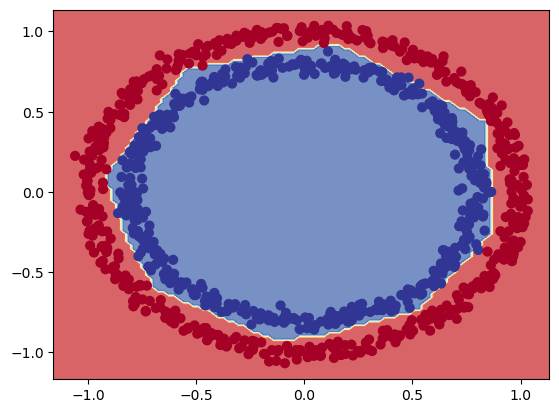

In [33]:
plot_decision_boundary(model_7, X, y)

## **Replicate non-linear activation functions**

In [34]:
A = tf.cast(tf.range(start = -10, limit = 10), dtype = tf.float64)

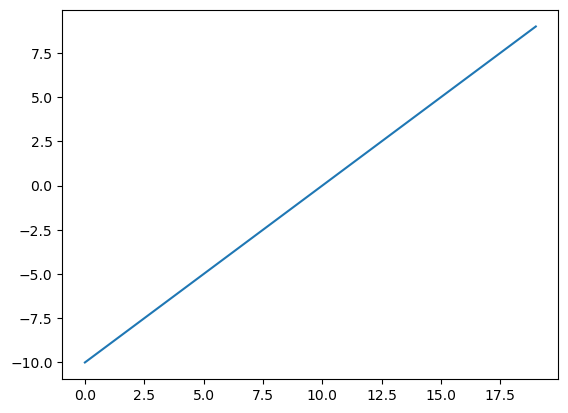

In [35]:
plt.plot(A);

### **Sigmoid function**

In [36]:
import math
def sigmoid_math(x):
    return 1 / (1 + math.exp (-x))

In [37]:
A_sigmoid_math = [sigmoid_math(x) for x in A]

In [38]:
def sigmoid_tf(x):
    return 1 / (1 + tf.exp(-x))

In [39]:
#sigmoid_tf(A) # gives the same result as the code below
A_sigmoid_tf = [sigmoid_tf(x).numpy() for x in A]

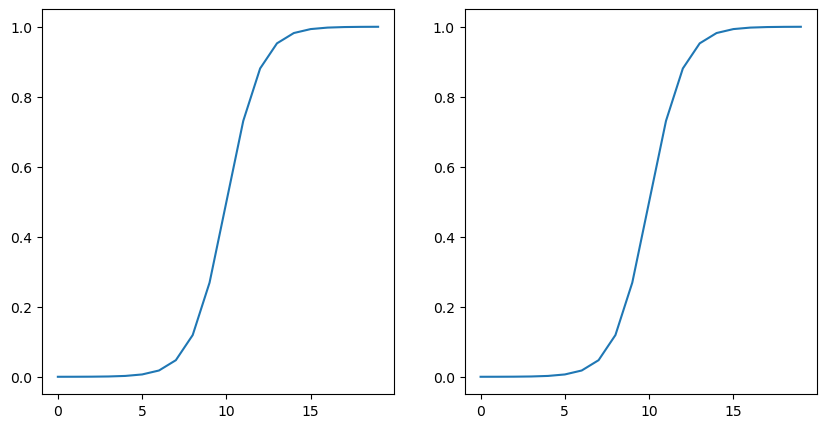

In [40]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
ax[0].plot(A_sigmoid_math)
ax[1].plot(A_sigmoid_tf);

### **ReLU funtion**

In [41]:
def relu_python(x):
    x = x.numpy()
    return max(x, 0)

In [42]:
A_relu_python = [relu_python(x) for x in A]

In [43]:
A_relu_python

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0]

In [44]:
def relu_tf(x):
    return tf.maximum(x, 0)

In [45]:
A_relu_tf = [relu_tf(x).numpy() for x in A]

In [46]:
A_relu_tf

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0]

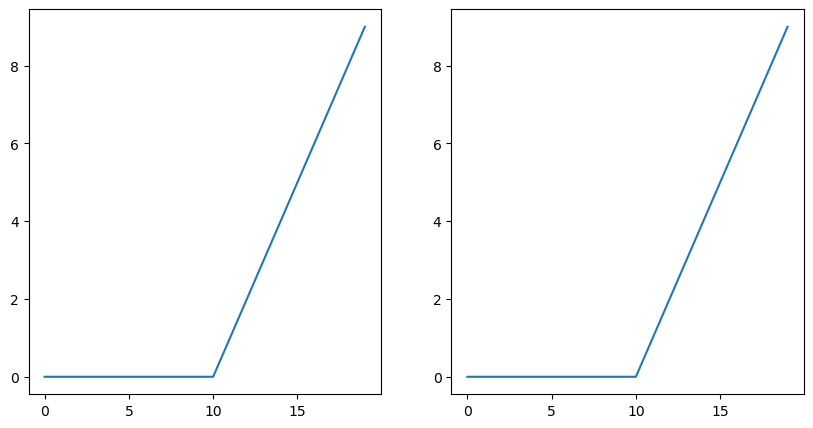

In [47]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 5))
ax[0].plot(A_relu_python)
ax[1].plot(A_relu_tf);

## **Split the dataset**

In [48]:
X_train, y_train = X[:800], y[:800]

In [49]:
X_test, y_test = X[800:], y[800:]

In [84]:
tf.keras.utils.set_random_seed(42)

model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 4, activation = 'relu'),
    tf.keras.layers.Dense(units = 4, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid')
])

model_8.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)

history_8 = model_8.fit(
    x = X_train,
    y = y_train,
    epochs = 25
)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5129 - loss: 0.7068 
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5001 - loss: 0.6932
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5135 - loss: 0.6891
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5418 - loss: 0.6846
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5527 - loss: 0.6793
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5991 - loss: 0.6715
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6396 - loss: 0.6576 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6520 - loss: 0.6390 
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6768 - loss: 0.6150 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7391 - loss: 0.5794 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7939 - loss: 0.5328 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.838

In [85]:
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9950 - loss: 0.0391


[0.03728700801730156, 0.9950000047683716]

In [86]:
y_pred = model_8.predict(X_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 828us/step
Binary classification


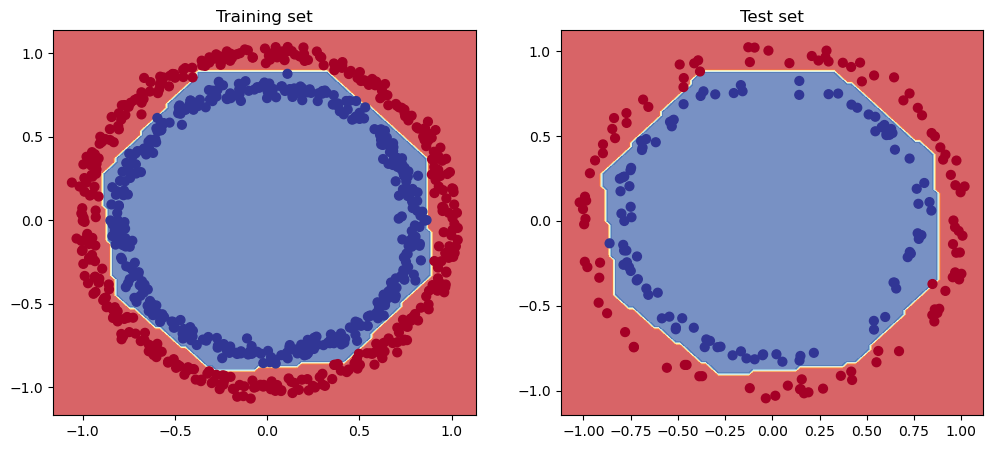

In [87]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plot_decision_boundary(model_8, X = X_train, y = y_train)
plt.title("Training set")
plt.subplot(1, 2, 2)
plot_decision_boundary(model_8, X = X_test, y = y_test)
plt.title("Test set")
plt.show()

## **Visualize model history**

In [88]:
history_8_df = pd.DataFrame(history_8.history)

In [89]:
history_8_df

,accuracy,loss
0,0.50000,0.700084
1,0.48875,0.693120
2,0.50500,0.689511
3,0.52500,0.685883
4,0.53375,0.681139
5,0.58500,0.672583
6,0.63125,0.657869
7,0.67125,0.638920
8,0.71250,0.612344
9,0.77375,0.572906


<Axes: >

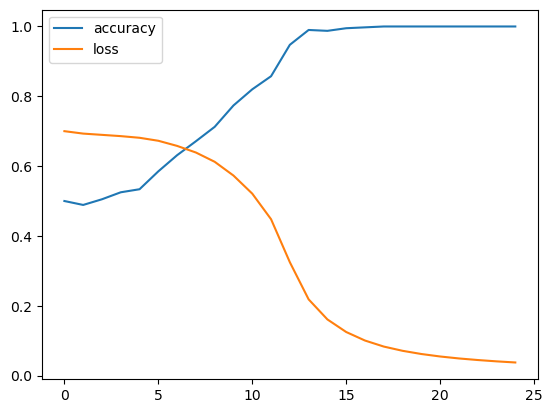

In [90]:
history_8_df.plot()

## **Using callbacks**

In [97]:
tf.keras.utils.set_random_seed(42)

model_9 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 4, activation = 'relu'),
    tf.keras.layers.Dense(units = 4, activation = 'relu'),
    tf.keras.layers.Dense(units = 1, activation = 'sigmoid'),
])

model_9.compile(
    loss = tf.keras.losses.binary_crossentropy,
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['accuracy']
)

# Create a callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10 ** (epoch/20))

history_9 = model_9.fit(
    x = X_train,
    y = y_train,
    epochs = 100,
    callbacks = [lr_scheduler]
)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5170 - loss: 0.7157 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5189 - loss: 0.7150 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5129 - loss: 0.7142 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5152 - loss: 0.7133 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5127 - loss: 0.7124 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5153 - loss: 0.7115 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5151 - loss: 0.7105 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5139 - loss: 0.7094 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5208 - loss: 0.7083 - learning_

In [99]:
history_9_df = pd.DataFrame(history_9.history)

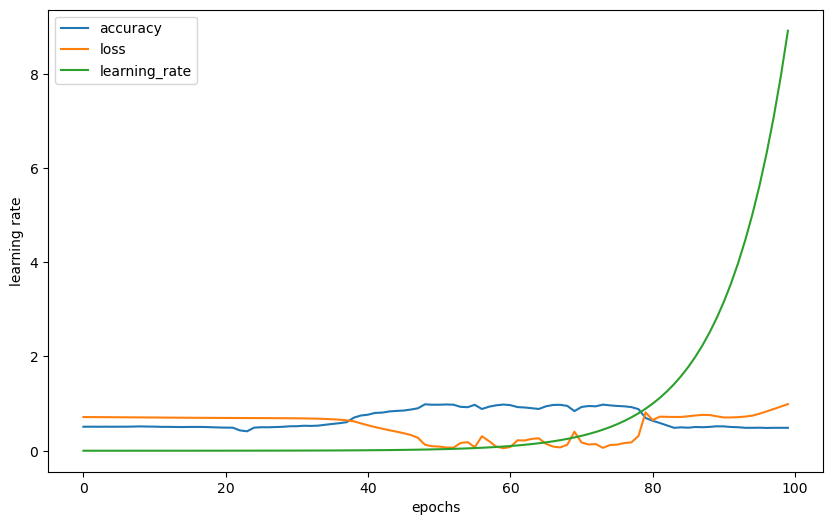

In [106]:
history_9_df.plot(figsize = (10, 6), xlabel = 'epochs', ylabel = 'learning rate');

In [115]:
lrs = 1e-4 * 10 ** (tf.range(100) / 20)

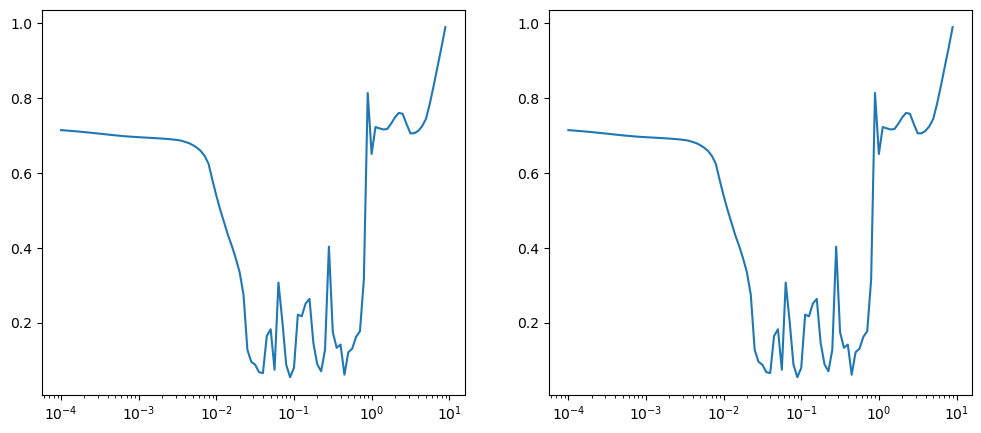

In [134]:
plt.figure(figsize = (12, 5))
plt.subplot(1, 2, 1)
plt.semilogx(history_9_df['learning_rate'], history_9_df['loss'])
plt.subplot(1, 2, 2)
plt.semilogx(lrs, history_9_df['loss'])
plt.show()

<tf.Tensor: shape=(100,), dtype=float64, numpy=
array([1.00000000e-04, 1.12201845e-04, 1.25892541e-04, 1.41253754e-04,
       1.58489319e-04, 1.77827941e-04, 1.99526231e-04, 2.23872114e-04,
       2.51188643e-04, 2.81838293e-04, 3.16227766e-04, 3.54813389e-04,
       3.98107171e-04, 4.46683592e-04, 5.01187234e-04, 5.62341325e-04,
       6.30957344e-04, 7.07945784e-04, 7.94328235e-04, 8.91250938e-04,
       1.00000000e-03, 1.12201845e-03, 1.25892541e-03, 1.41253754e-03,
       1.58489319e-03, 1.77827941e-03, 1.99526231e-03, 2.23872114e-03,
       2.51188643e-03, 2.81838293e-03, 3.16227766e-03, 3.54813389e-03,
       3.98107171e-03, 4.46683592e-03, 5.01187234e-03, 5.62341325e-03,
       6.30957344e-03, 7.07945784e-03, 7.94328235e-03, 8.91250938e-03,
       1.00000000e-02, 1.12201845e-02, 1.25892541e-02, 1.41253754e-02,
       1.58489319e-02, 1.77827941e-02, 1.99526231e-02, 2.23872114e-02,
       2.51188643e-02, 2.81838293e-02, 3.16227766e-02, 3.54813389e-02,
       3.98107171e-02, 4.4668